In [285]:
import pandas as pd

# Load all sheets from the Excel file into a dictionary of DataFrames
df = 'final data.xlsx'

gmv_df = pd.read_excel(df, sheet_name='GMV')
followers_df = pd.read_excel(df, sheet_name='Followers')
approved_df = pd.read_excel(df, sheet_name='Approved Free Samples')
not_approved_df = pd.read_excel(df, sheet_name='Not Approved Free Samples')
stores_df = pd.read_excel(df, sheet_name='Stores Information')
content_df = pd.read_excel(df, sheet_name='Content Performance')

##**1. DATA UNDERSTANDING**

"N/A" Values in Content Performance - 64 posts are regular content (N/A for Request_ID)

In [286]:
# Loop through all sheets and check for missing values
for sheet_name, sheet_df in all_sheets_df.items():
    # Check for missing values in the sheet
    missing_values = sheet_df.isnull().sum()

    print(f"Missing values for sheet: {sheet_name}")
    print(missing_values)
    print("="*80)

Missing values for sheet: GMV
Date                    0
Number_of_Items_Sold    0
GMV                     0
dtype: int64
Missing values for sheet: Followers
Date                                    0
Total_of_Followers/Day                  0
Number_of_Followers (Added/Deducted)    0
dtype: int64
Missing values for sheet: Approved Free Samples
Request_ID              0
Date_Requested          0
Approval_Status_Date    0
Date_Delivered          0
Product_Store_Name      0
Product_Name            0
Product_Price           0
dtype: int64
Missing values for sheet: Not Approved Free Samples
Request_ID               0
Date_Requested           0
Status_Date              0
Not_Approved_Category    0
Product_Store_Name       0
Product                  0
Product_Price            0
dtype: int64
Missing values for sheet: Stores Information
Product_Store_Name        0
Store_Rating              0
Overall_Total_Of_Sales    0
dtype: int64
Missing values for sheet: Content Performance
Post_ID            

In [287]:
print("Shape of each sheet:")
for sheet_name, sheet_df in all_sheets_df.items():
    print(f"- {sheet_name}: {sheet_df.shape}")

Shape of each sheet:
- GMV: (403, 3)
- Followers: (403, 3)
- Approved Free Samples: (75, 7)
- Not Approved Free Samples: (74, 7)
- Stores Information: (61, 3)
- Content Performance: (134, 12)


In [288]:
print("First 5 rows of each sheet:")
for sheet_name, sheet_df in all_sheets_df.items():
    print(f"- {sheet_name}: {sheet_df.head}")

First 5 rows of each sheet:
- GMV: <bound method NDFrame.head of           Date  Number_of_Items_Sold     GMV
0   2025-01-01                     0    0.00
1   2025-01-02                     0    0.00
2   2025-01-03                     0    0.00
3   2025-01-04                     0    0.00
4   2025-01-05                     0    0.00
..         ...                   ...     ...
398 2026-02-03                     8  627.85
399 2026-02-04                     0    0.00
400 2026-02-05                     0    0.00
401 2026-02-06                     0    0.00
402 2026-02-07                     0    0.00

[403 rows x 3 columns]>
- Followers: <bound method NDFrame.head of           Date  Total_of_Followers/Day  Number_of_Followers (Added/Deducted)
0   2025-01-01                       0                                     0
1   2025-01-02                       0                                     0
2   2025-01-03                       0                                     0
3   2025-01-04     

In [289]:
print("Data Types of each sheet:")
for sheet_name, sheet_df in all_sheets_df.items():
    print(f"- {sheet_name}:")
    print(sheet_df.dtypes)

Data Types of each sheet:
- GMV:
Date                    datetime64[ns]
Number_of_Items_Sold             int64
GMV                            float64
dtype: object
- Followers:
Date                                    datetime64[ns]
Total_of_Followers/Day                           int64
Number_of_Followers (Added/Deducted)             int64
dtype: object
- Approved Free Samples:
Request_ID                       int64
Date_Requested          datetime64[ns]
Approval_Status_Date    datetime64[ns]
Date_Delivered          datetime64[ns]
Product_Store_Name              object
Product_Name                    object
Product_Price                  float64
dtype: object
- Not Approved Free Samples:
Request_ID                        int64
Date_Requested           datetime64[ns]
Status_Date              datetime64[ns]
Not_Approved_Category            object
Product_Store_Name               object
Product                          object
Product_Price                   float64
dtype: object
- Stores 

In [290]:
gmv_df.describe()

,Date,Number_of_Items_Sold,GMV
count,403,403.000000,403.000000
mean,2025-07-21 00:00:00,0.533499,68.794566
min,2025-01-01 00:00:00,0.000000,0.000000
25%,2025-04-11 12:00:00,0.000000,0.000000
50%,2025-07-21 00:00:00,0.000000,0.000000
75%,2025-10-29 12:00:00,0.000000,0.000000
max,2026-02-07 00:00:00,14.000000,2285.960000
std,NaN,1.631696,213.356855


In [291]:
print("\nInterpretation: 403 days of data. Mean GMV = 68.79 pesos, max = 2285.96 pesos")


Interpretation: 403 days of data. Mean GMV = 68.79 pesos, max = 2285.96 pesos


In [292]:
non_zero_sales = gmv_df[gmv_df['Number_of_Items_Sold'] > 0]
print(f"Days with sales: {len(non_zero_sales)}/{len(gmv_df)} ({len(non_zero_sales)/len(gmv_df)*100:.1f}%)")

Days with sales: 72/403 (17.9%)


In [293]:
not_approved_df['Product_Price'].describe()

,Product_Price
count,74.000000
mean,382.336622
std,524.803121
min,42.000000
25%,124.500000
50%,268.635000
75%,444.077500
max,3279.180000


In [294]:
print(f"Shape: {content_df.shape} - {content_df.shape[0]} total posts")

Shape: (134, 12) - 134 total posts


In [295]:
print(f"\nPosts with sample links: {content_df['Request_ID (if related to sample)'].notna().sum()}")
print(f"Posts without samples: {content_df['Request_ID (if related to sample)'].isna().sum()}")


Posts with sample links: 70
Posts without samples: 64


In [296]:
print("\nEngagement stats:")
print(content_df[['Number_of_Views', 'Number_of_Likes', 'Number_of_Comments']].describe())


Engagement stats:
       Number_of_Views  Number_of_Likes  Number_of_Comments
count       134.000000       134.000000           134.00000
mean        469.634328        25.888060             5.00000
std         371.258509        30.107492            11.18471
min          42.000000         2.000000             0.00000
25%         173.250000         9.000000             0.00000
50%         340.500000        14.000000             1.00000
75%         630.250000        30.000000             3.00000
max        1507.000000       191.000000            69.00000


In [297]:
content_df['Type_of_Post (branded/not)'] = content_df['Type_of_Post (branded/not)'].str.strip().str.lower()
print("\nContent type distribution:")
print(content_df['Type_of_Post (branded/not)'].value_counts())


Content type distribution:
Type_of_Post (branded/not)
branded        93
not branded    41
Name: count, dtype: int64


In [298]:
# Balance check
total_samples = len(approved_df) + len(not_approved_df)
approval_rate = len(approved_df) / total_samples * 100

print(f"\n BALANCE CHECK:")
print(f"  Total samples: {total_samples}")
print(f"  Approved: {len(approved_df)} ({approval_rate:.1f}%)")
print(f"  Not Approved: {len(not_approved_df)} ({100-approval_rate:.1f}%)")

if 40 <= approval_rate <= 60:
    print(f"  PERFECTLY BALANCED (50/50 split)")
elif 30 <= approval_rate <= 70:
    print(f"  Well balanced (within 70/30 range)")
else:
    print(f"  IMBALANCED - May need to address in analysis")


 BALANCE CHECK:
  Total samples: 149
  Approved: 75 (50.3%)
  Not Approved: 74 (49.7%)
  PERFECTLY BALANCED (50/50 split)


##**2. Data Cleaning And Preprocessing**

In [299]:
print("CREATING MASTER SAMPLE DATASET")
print("-"*80)

approved_df['Approval_Status'] = 1
not_approved_df['Approval_Status'] = 0

approved_clean = approved_df[['Request_ID', 'Date_Requested', 'Approval_Status_Date',
                               'Product_Store_Name', 'Product_Price', 'Approval_Status']].copy()
approved_clean.rename(columns={'Approval_Status_Date': 'Status_Date'}, inplace=True)

not_approved_clean = not_approved_df[['Request_ID', 'Date_Requested', 'Status_Date',
                                       'Product_Store_Name', 'Product_Price', 'Approval_Status']].copy()

samples_master = pd.concat([approved_clean, not_approved_clean], ignore_index=True)
samples_master = samples_master.sort_values('Date_Requested').reset_index(drop=True)

print(f"Total: {len(samples_master)}, Approved: {samples_master['Approval_Status'].sum()}")
print(f"Approval rate: {samples_master['Approval_Status'].mean()*100:.1f}%")

CREATING MASTER SAMPLE DATASET
--------------------------------------------------------------------------------
Total: 149, Approved: 75
Approval rate: 50.3%


In [300]:
#CALCULATING HISTORICAL METRICS"

samples_master['Cumulative_GMV'] = 0.0
samples_master['Cumulative_Followers'] = 0
samples_master['Cumulative_Posts'] = 0
samples_master['Cumulative_Views'] = 0
samples_master['Cumulative_Likes'] = 0
samples_master['Cumulative_Comments'] = 0
samples_master['Cumulative_Shares'] = 0
samples_master['Branded_Posts_Count'] = 0

for idx, row in samples_master.iterrows():
    request_date = row['Date_Requested']

    cumulative_gmv = gmv_df[gmv_df['Date'] < request_date]['GMV'].sum()
    samples_master.at[idx, 'Cumulative_GMV'] = cumulative_gmv

    followers_on_date = followers_df[followers_df['Date'] <= request_date]['Total_of_Followers/Day'].iloc[-1] if len(followers_df[followers_df['Date'] <= request_date]) > 0 else 0
    samples_master.at[idx, 'Cumulative_Followers'] = followers_on_date

    historical_posts = content_df[content_df['Date_Posted'] < request_date]

    if len(historical_posts) > 0:
        samples_master.at[idx, 'Cumulative_Posts'] = len(historical_posts)
        samples_master.at[idx, 'Cumulative_Views'] = historical_posts['Number_of_Views'].sum()
        samples_master.at[idx, 'Cumulative_Likes'] = historical_posts['Number_of_Likes'].sum()
        samples_master.at[idx, 'Cumulative_Comments'] = historical_posts['Number_of_Comments'].sum()
        samples_master.at[idx, 'Cumulative_Shares'] = historical_posts['Number_of_Shares'].sum()

        branded_count = historical_posts[historical_posts['Type_of_Post (branded/not)'] == 'branded'].shape[0]
        samples_master.at[idx, 'Branded_Posts_Count'] = branded_count

#CALCULATING DERIVED METRICS

samples_master['Avg_Views_Per_Post'] = samples_master.apply(
    lambda x: x['Cumulative_Views'] / x['Cumulative_Posts'] if x['Cumulative_Posts'] > 0 else 0, axis=1)

samples_master['Avg_Likes_Per_Post'] = samples_master.apply(
    lambda x: x['Cumulative_Likes'] / x['Cumulative_Posts'] if x['Cumulative_Posts'] > 0 else 0, axis=1)

samples_master['Engagement_Rate'] = samples_master.apply(
    lambda x: ((x['Cumulative_Likes'] + x['Cumulative_Comments']) / x['Cumulative_Views'] * 100)
    if x['Cumulative_Views'] > 0 else 0, axis=1)

samples_master['Branded_Ratio'] = samples_master.apply(
    lambda x: (x['Branded_Posts_Count'] / x['Cumulative_Posts'] * 100) if x['Cumulative_Posts'] > 0 else 0, axis=1)

samples_master = samples_master.merge(stores_df, on='Product_Store_Name', how='left')

samples_master.to_csv('cleaned_sample_data.csv', index=False)
print("Saved: cleaned_sample_data.csv")

Saved: cleaned_sample_data.csv


In [301]:
# Outlier detection
prices = samples_master['Product_Price']
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (prices < lower_bound) | (prices > upper_bound)
n_outliers = outliers_mask.sum()

print(f"Price Distribution:")
print(f"  Mean: ₱{prices.mean():.2f}")
print(f"  Median: ₱{prices.median():.2f}")
print(f"  Std Dev: ₱{prices.std():.2f}")
print(f"  Range: ₱{prices.min():.2f} - ₱{prices.max():.2f}")

print(f"\nIQR Method:")
print(f"  Q1: ₱{Q1:.2f}, Q3: ₱{Q3:.2f}, IQR: ₱{IQR:.2f}")
print(f"  Outlier bounds: [₱{lower_bound:.2f}, ₱{upper_bound:.2f}]")
print(f"  Outliers detected: {n_outliers} ({n_outliers/len(prices)*100:.1f}%)")

if n_outliers > 0:
    outlier_values = prices[outliers_mask].sort_values(ascending=False)
    print(f"\n  Outlier values:")
    for val in outlier_values.values:
        approval_status = samples_master.loc[samples_master['Product_Price'] == val, 'Approval_Status'].iloc[0]
        status_text = "APPROVED" if approval_status == 1 else "NOT APPROVED"
        print(f"    ₱{val:,.2f} ({status_text})")

Price Distribution:
  Mean: ₱328.66
  Median: ₱227.42
  Std Dev: ₱483.40
  Range: ₱23.00 - ₱3779.00

IQR Method:
  Q1: ₱126.00, Q3: ₱369.00, IQR: ₱243.00
  Outlier bounds: [₱-238.50, ₱733.50]
  Outliers detected: 8 (5.4%)

  Outlier values:
    ₱3,779.00 (APPROVED)
    ₱3,279.18 (NOT APPROVED)
    ₱3,090.00 (NOT APPROVED)
    ₱1,269.50 (NOT APPROVED)
    ₱792.27 (NOT APPROVED)
    ₱752.56 (NOT APPROVED)
    ₱750.00 (NOT APPROVED)
    ₱740.90 (NOT APPROVED)


##**EDA**

/tmp/ipython-input-1263413555.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([approved_prices, not_approved_prices], labels=['Approved', 'Not Approved'])


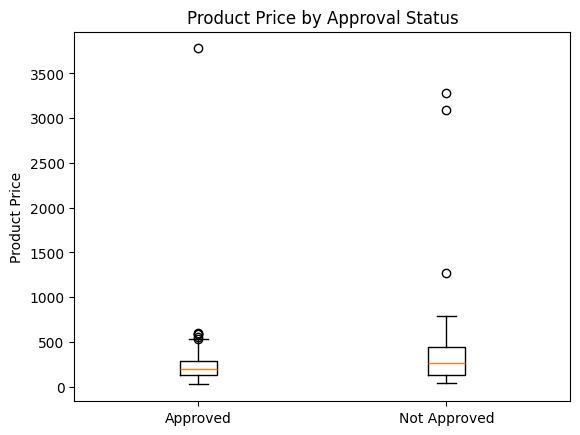

Approved Mean Price: 275.7
Not Approved Mean Price: 382.34
Difference: -106.64


In [302]:
# H₂: PRODUCT PRICE ANALYSIS

import matplotlib.pyplot as plt
import seaborn as sns

approved_prices = samples_master[samples_master['Approval_Status'] == 1]['Product_Price']
not_approved_prices = samples_master[samples_master['Approval_Status'] == 0]['Product_Price']

plt.figure()
plt.boxplot([approved_prices, not_approved_prices], labels=['Approved', 'Not Approved'])
plt.ylabel('Product Price')
plt.title('Product Price by Approval Status')
plt.show()

print("Approved Mean Price:", round(approved_prices.mean(),2))
print("Not Approved Mean Price:", round(not_approved_prices.mean(),2))
print("Difference:", round(approved_prices.mean() - not_approved_prices.mean(),2))

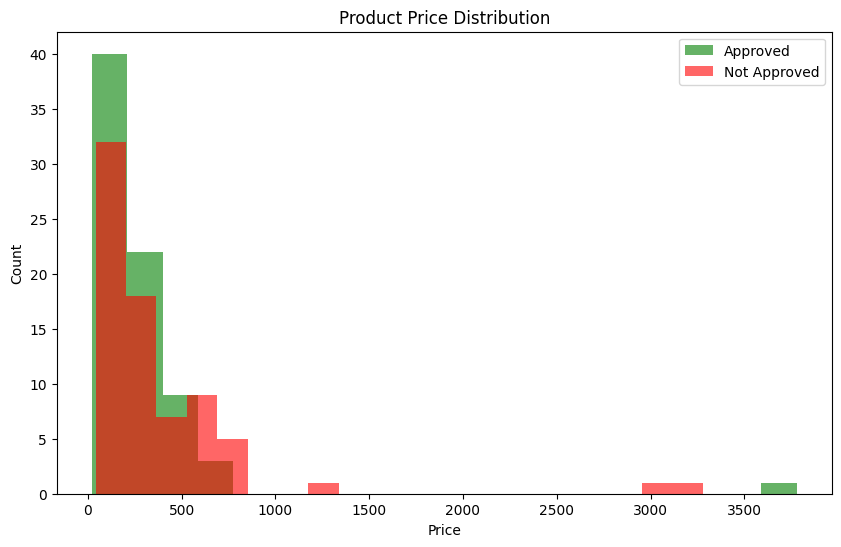

In [303]:
# Price Distribution Histogram

plt.figure(figsize=(10, 6))
plt.hist(approved_prices, bins=20, alpha=0.6, label='Approved', color='green')
plt.hist(not_approved_prices, bins=20, alpha=0.6, label='Not Approved', color='red')
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Product Price Distribution')
plt.legend()
plt.show()

/tmp/ipython-input-2617150982.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([approved_eng, not_approved_eng], labels=['Approved', 'Not Approved'])


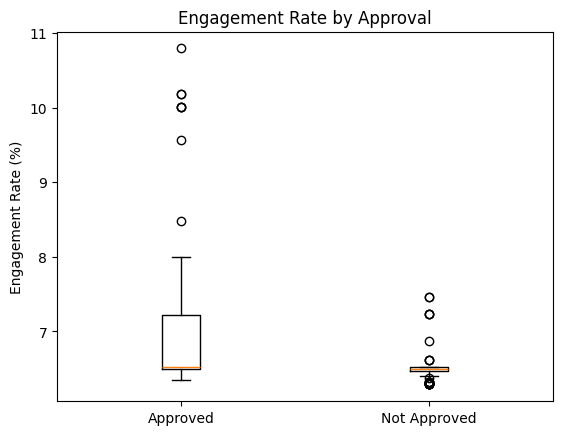

Approved Engagement Mean: 7.06
Not Approved Engagement Mean: 6.52


In [304]:
# H₁-A: ENGAGEMENT RATE

samples_with_engagement = samples_master[samples_master['Cumulative_Posts'] > 0]

approved_eng = samples_with_engagement[samples_with_engagement['Approval_Status'] == 1]['Engagement_Rate']
not_approved_eng = samples_with_engagement[samples_with_engagement['Approval_Status'] == 0]['Engagement_Rate']

plt.figure()
plt.boxplot([approved_eng, not_approved_eng], labels=['Approved', 'Not Approved'])
plt.ylabel('Engagement Rate (%)')
plt.title('Engagement Rate by Approval')
plt.show()

print("Approved Engagement Mean:", round(approved_eng.mean(),2))
print("Not Approved Engagement Mean:", round(not_approved_eng.mean(),2))

/tmp/ipython-input-3638389057.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([approved_views, not_approved_views], labels=['Approved', 'Not Approved'])


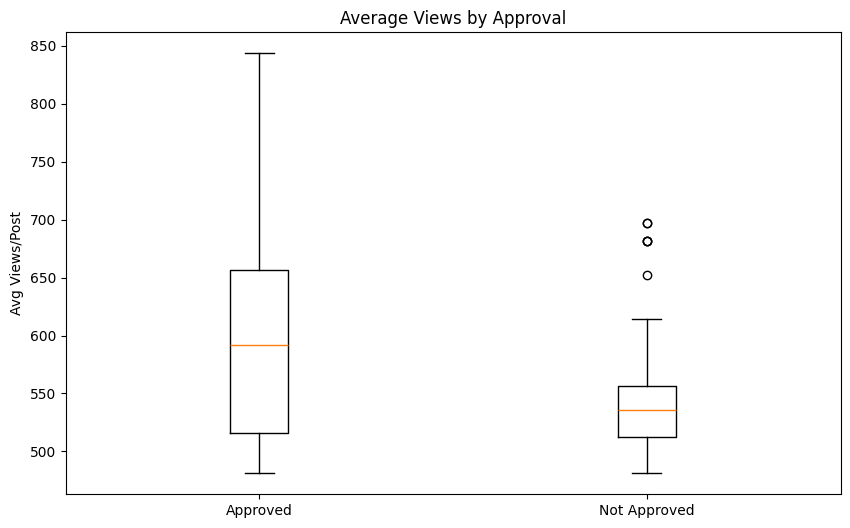

In [305]:
# Average Views Per Post by Approval Status
approved_views = samples_with_engagement[samples_with_engagement['Approval_Status'] == 1]['Avg_Views_Per_Post']
not_approved_views = samples_with_engagement[samples_with_engagement['Approval_Status'] == 0]['Avg_Views_Per_Post']

plt.figure(figsize=(10, 6))
plt.boxplot([approved_views, not_approved_views], labels=['Approved', 'Not Approved'])
plt.ylabel('Avg Views/Post')
plt.title('Average Views by Approval')
plt.show()

/tmp/ipython-input-726727296.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([approved_likes, not_approved_likes], labels=['Approved', 'Not Approved'])


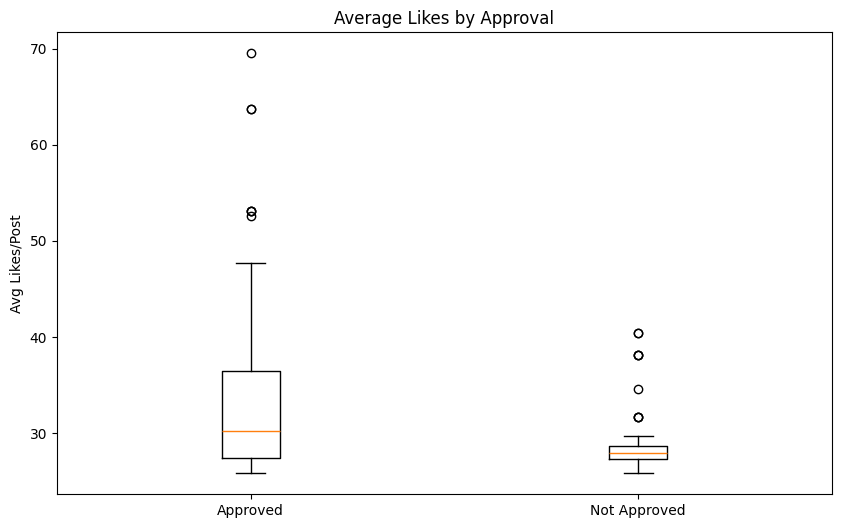

In [306]:
# Average Likes Per Post by Approval Status
approved_likes = samples_with_engagement[samples_with_engagement['Approval_Status'] == 1]['Avg_Likes_Per_Post']
not_approved_likes = samples_with_engagement[samples_with_engagement['Approval_Status'] == 0]['Avg_Likes_Per_Post']

plt.figure(figsize=(10, 6))
plt.boxplot([approved_likes, not_approved_likes], labels=['Approved', 'Not Approved'])
plt.ylabel('Avg Likes/Post')
plt.title('Average Likes by Approval')
plt.show()

/tmp/ipython-input-2760184285.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([approved_branded, not_approved_branded], labels=['Approved', 'Not Approved'])


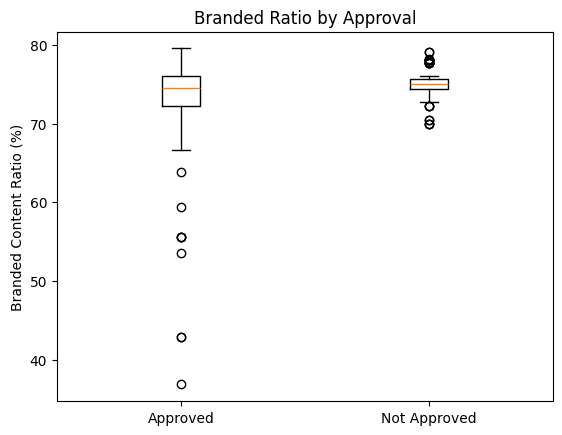

Approved Branded Mean: 71.68
Not Approved Branded Mean: 74.99


In [307]:
# H₁-B: BRANDED CONTENT RATIO

approved_branded = samples_with_engagement[samples_with_engagement['Approval_Status'] == 1]['Branded_Ratio']
not_approved_branded = samples_with_engagement[samples_with_engagement['Approval_Status'] == 0]['Branded_Ratio']

plt.figure()
plt.boxplot([approved_branded, not_approved_branded], labels=['Approved', 'Not Approved'])
plt.ylabel('Branded Content Ratio (%)')
plt.title('Branded Ratio by Approval')
plt.show()

print("Approved Branded Mean:", round(approved_branded.mean(),2))
print("Not Approved Branded Mean:", round(not_approved_branded.mean(),2))

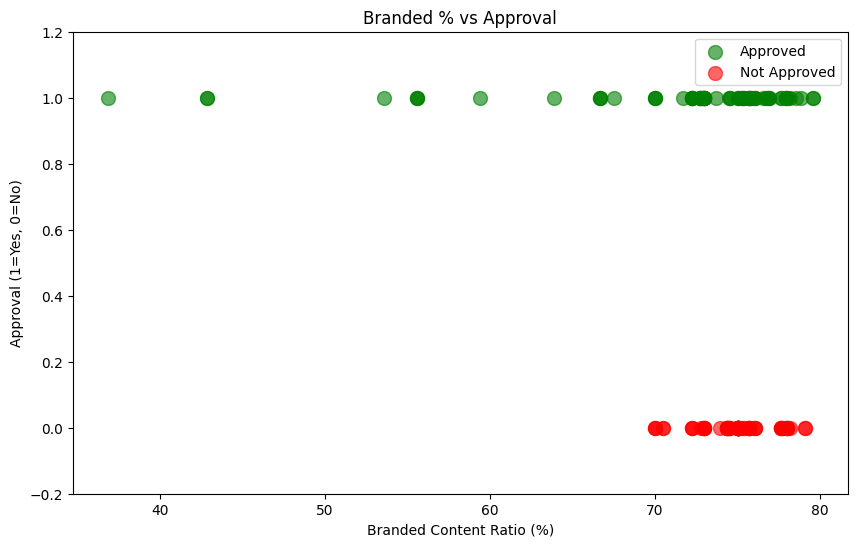

In [308]:
# Branded Content Ratio vs Approval Scatter Plot

plt.figure(figsize=(10, 6))
plt.scatter(approved_scatter['Branded_Ratio'], approved_scatter['Approval_Status'], alpha=0.6, color='green', label='Approved', s=100)
plt.scatter(not_approved_scatter['Branded_Ratio'], not_approved_scatter['Approval_Status'], alpha=0.6, color='red', label='Not Approved', s=100)
plt.xlabel('Branded Content Ratio (%)')
plt.ylabel('Approval (1=Yes, 0=No)')
plt.title('Branded % vs Approval')
plt.legend()
plt.ylim([-0.2, 1.2])
plt.show()

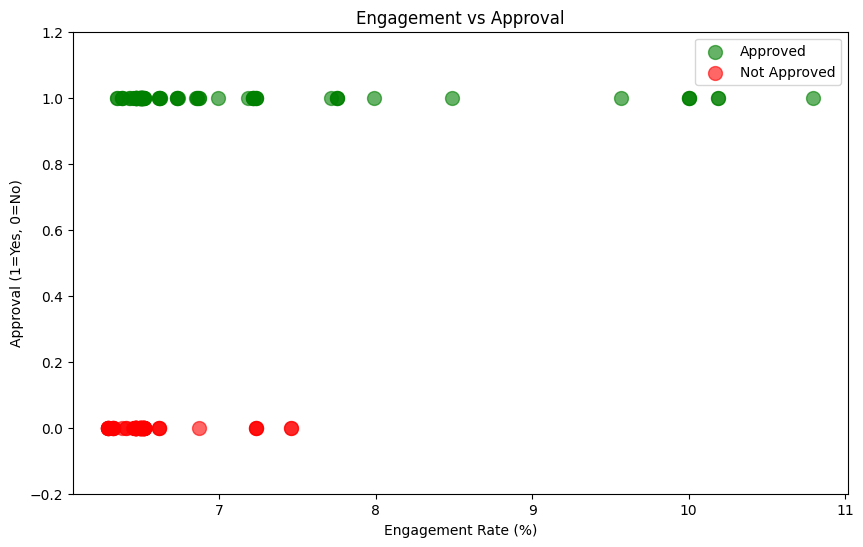

In [309]:
# Engagement Rate vs Approval Scatter Plot
approved_scatter = samples_with_engagement[samples_with_engagement['Approval_Status'] == 1]
not_approved_scatter = samples_with_engagement[samples_with_engagement['Approval_Status'] == 0]

plt.figure(figsize=(10, 6))
plt.scatter(approved_scatter['Engagement_Rate'], approved_scatter['Approval_Status'], alpha=0.6, color='green', label='Approved', s=100)
plt.scatter(not_approved_scatter['Engagement_Rate'], not_approved_scatter['Approval_Status'], alpha=0.6, color='red', label='Not Approved', s=100)
plt.xlabel('Engagement Rate (%)')
plt.ylabel('Approval (1=Yes, 0=No)')
plt.title('Engagement vs Approval')
plt.legend()
plt.ylim([-0.2, 1.2])
plt.show()

/tmp/ipython-input-3092171002.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([approved_gmv, not_approved_gmv], labels=['Approved', 'Not Approved'])


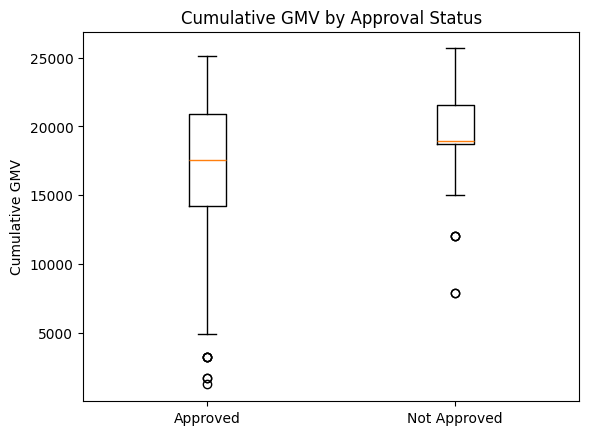

Approved GMV Mean: 16434.85
Not Approved GMV Mean: 19495.01


In [310]:
# H₃: CUMULATIVE GMV

approved_gmv = samples_master[samples_master['Approval_Status'] == 1]['Cumulative_GMV']
not_approved_gmv = samples_master[samples_master['Approval_Status'] == 0]['Cumulative_GMV']

plt.figure()
plt.boxplot([approved_gmv, not_approved_gmv], labels=['Approved', 'Not Approved'])
plt.ylabel('Cumulative GMV')
plt.title('Cumulative GMV by Approval Status')
plt.show()

print("Approved GMV Mean:", round(approved_gmv.mean(),2))
print("Not Approved GMV Mean:", round(not_approved_gmv.mean(),2))

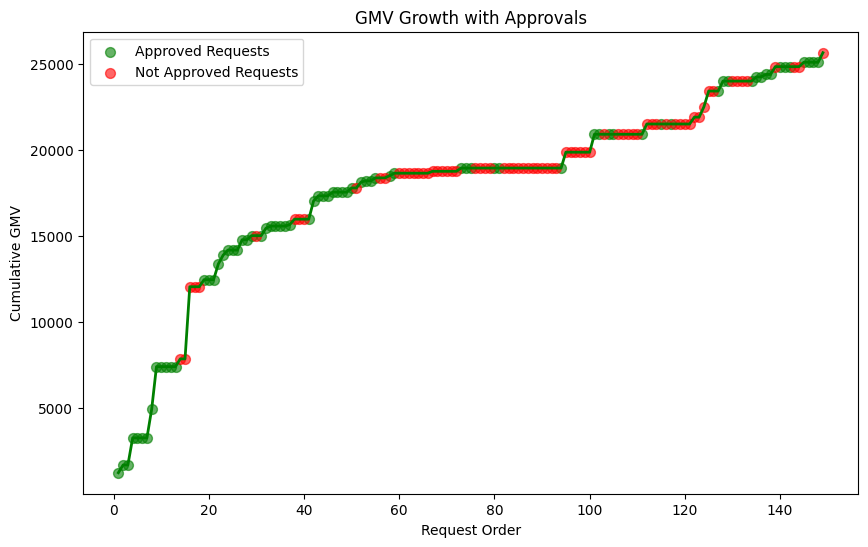

In [311]:
# GMV Growth with Approvals
samples_sorted = samples_master.sort_values(by='Date_Requested').reset_index(drop=True)
samples_sorted['Request_Order'] = samples_sorted.index + 1

plt.figure(figsize=(10, 6))
plt.plot(samples_sorted['Request_Order'], samples_sorted['Cumulative_GMV'], linewidth=2, color='green')
approved_reqs = samples_sorted[samples_sorted['Approval_Status'] == 1]
not_approved_reqs = samples_sorted[samples_sorted['Approval_Status'] == 0]
plt.scatter(approved_reqs['Request_Order'], approved_reqs['Cumulative_GMV'], color='green', s=50, alpha=0.6, label='Approved Requests')
plt.scatter(not_approved_reqs['Request_Order'], not_approved_reqs['Cumulative_GMV'], color='red', s=50, alpha=0.6, label='Not Approved Requests')
plt.xlabel('Request Order')
plt.ylabel('Cumulative GMV')
plt.title('GMV Growth with Approvals')
plt.legend()
plt.show()

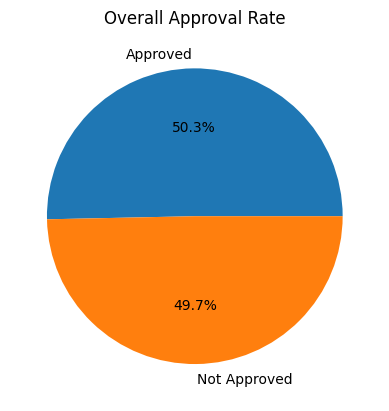

Approval Rate: 50.34 %


In [312]:
# OVERALL APPROVAL RATE

approval_counts = samples_master['Approval_Status'].value_counts()

plt.figure()
plt.pie(approval_counts, labels=['Approved', 'Not Approved'], autopct='%1.1f%%')
plt.title('Overall Approval Rate')
plt.show()

print("Approval Rate:", round(samples_master['Approval_Status'].mean()*100,2), "%")

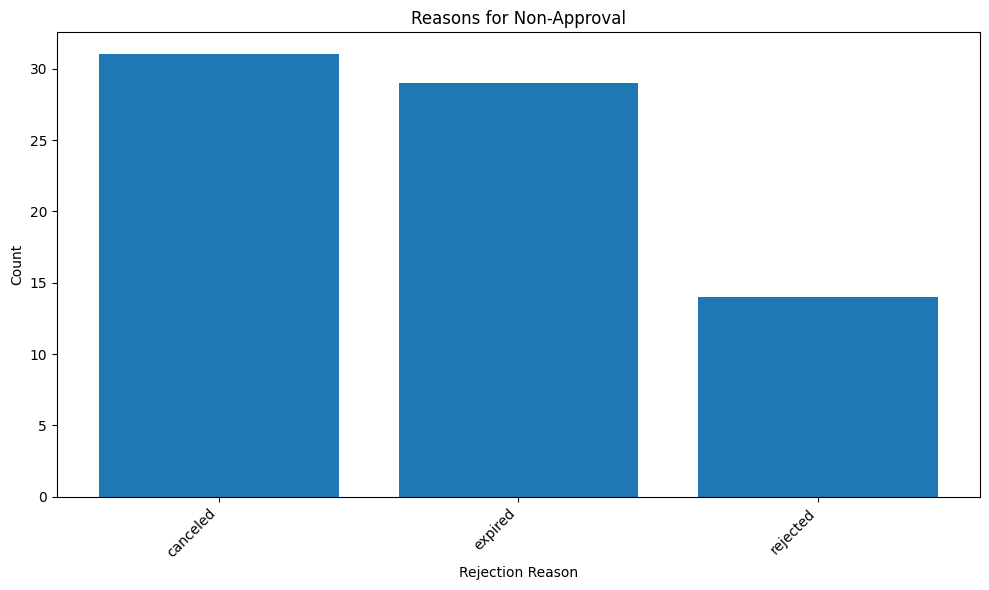

In [313]:
# Reasons for Non-Approval Bar Chart

# Count the reasons for non-approval
rejection_reasons = not_approved_df['Not_Approved_Category'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(rejection_reasons.index, rejection_reasons.values)
plt.xlabel('Rejection Reason')
plt.ylabel('Count')
plt.title('Reasons for Non-Approval')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

##**Statistical Testing**

In [314]:
import numpy as np
from scipy import stats

# Test 1: Engagement Rate
print("\nTEST 1: ENGAGEMENT RATE EFFECT (H₁-A)")
print("H₀: Engagement rate has NO effect on approval")
print("H₁: Higher engagement → Higher approval")

approved_eng = samples_with_engagement[samples_with_engagement['Approval_Status'] == 1]['Engagement_Rate']
not_approved_eng = samples_with_engagement[samples_with_engagement['Approval_Status'] == 0]['Engagement_Rate']

stat_norm_a, p_norm_a = stats.shapiro(approved_eng)
stat_norm_n, p_norm_n = stats.shapiro(not_approved_eng)
print(f"Normality - Approved: p={p_norm_a:.4f}, Not Approved: p={p_norm_n:.4f}")

stat_levene, p_levene = stats.levene(approved_eng, not_approved_eng)
print(f"Equal variance: p={p_levene:.4f}")
equal_var = p_levene > 0.05

t_stat, p_two = stats.ttest_ind(approved_eng, not_approved_eng, equal_var=equal_var)
p_one = p_two / 2

print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value (one-tailed): {p_one:.4f}")

if p_one < 0.05:
    print("✓ REJECT H₀ - Significant relationship found!")
else:
    print("✗ FAIL TO REJECT H₀ - No significant relationship")

print(f"\nApproved mean: {approved_eng.mean():.2f}%, Not Approved: {not_approved_eng.mean():.2f}%")



TEST 1: ENGAGEMENT RATE EFFECT (H₁-A)
H₀: Engagement rate has NO effect on approval
H₁: Higher engagement → Higher approval
Normality - Approved: p=0.0000, Not Approved: p=0.0000
Equal variance: p=0.0002

t-statistic: 4.2304
p-value (one-tailed): 0.0000
✓ REJECT H₀ - Significant relationship found!

Approved mean: 7.06%, Not Approved: 6.52%


In [315]:
# Test 2: Branded Ratio
print("TEST 2: BRANDED CONTENT RATIO (H₁-B)")
print("H₀: Branded ratio has NO effect")
print("H₁: Higher branded ratio → Higher approval")

approved_br = samples_with_engagement[samples_with_engagement['Approval_Status'] == 1]['Branded_Ratio']
not_approved_br = samples_with_engagement[samples_with_engagement['Approval_Status'] == 0]['Branded_Ratio']

t_stat_br, p_two_br = stats.ttest_ind(approved_br, not_approved_br)
p_one_br = p_two_br / 2

print(f"t-statistic: {t_stat_br:.4f}")
print(f"p-value: {p_one_br:.4f}")

if p_one_br < 0.05:
    print("✓ REJECT H₀ - Significant!")
else:
    print("✗ FAIL TO REJECT H₀")

print(f"Approved: {approved_br.mean():.1f}%, Not Approved: {not_approved_br.mean():.1f}%")

TEST 2: BRANDED CONTENT RATIO (H₁-B)
H₀: Branded ratio has NO effect
H₁: Higher branded ratio → Higher approval
t-statistic: -3.2739
p-value: 0.0007
✓ REJECT H₀ - Significant!
Approved: 71.7%, Not Approved: 75.0%


In [316]:
# Test 3: Product Price
print("TEST 3: PRODUCT PRICE EFFECT (H₂)")
print("H₀: Price has NO effect")
print("H₁: LOWER price → Higher approval")

approved_pr = samples_master[samples_master['Approval_Status'] == 1]['Product_Price']
not_approved_pr = samples_master[samples_master['Approval_Status'] == 0]['Product_Price']

t_stat_pr, p_two_pr = stats.ttest_ind(approved_pr, not_approved_pr)
p_one_pr = p_two_pr / 2 if t_stat_pr < 0 else 1 - (p_two_pr / 2)

print(f"t-statistic: {t_stat_pr:.4f}")
print(f"p-value (left-tailed): {p_one_pr:.4f}")

if p_one_pr < 0.05 and approved_pr.mean() < not_approved_pr.mean():
    print("✓ REJECT H₀ - Approved products ARE cheaper!")
else:
    print("✗ FAIL TO REJECT H₀")

print(f"Approved: {approved_pr.mean():.2f}, Not Approved: {not_approved_pr.mean():.2f}")

TEST 3: PRODUCT PRICE EFFECT (H₂)
H₀: Price has NO effect
H₁: LOWER price → Higher approval
t-statistic: -1.3501
p-value (left-tailed): 0.0895
✗ FAIL TO REJECT H₀
Approved: 275.70, Not Approved: 382.34


In [317]:
# Test 4: GMV
print("TEST 4: CUMULATIVE GMV EFFECT (H₃)")
print("H₀: GMV has NO correlation with approval")
print("H₁: Higher GMV → Higher approval")

approved_gmv = samples_master[samples_master['Approval_Status'] == 1]['Cumulative_GMV']
not_approved_gmv = samples_master[samples_master['Approval_Status'] == 0]['Cumulative_GMV']

t_stat_gmv, p_two_gmv = stats.ttest_ind(approved_gmv, not_approved_gmv)
p_one_gmv = p_two_gmv / 2

print(f"t-statistic: {t_stat_gmv:.4f}")
print(f"p-value: {p_one_gmv:.4f}")


if p_one_gmv < 0.05:
    print("✓ REJECT H₀ - Significant!")
else:
    print("✗ FAIL TO REJECT H₀")

print(f"Approved: {approved_gmv.mean():,.2f}, Not Approved: {not_approved_gmv.mean():,.2f}")

TEST 4: CUMULATIVE GMV EFFECT (H₃)
H₀: GMV has NO correlation with approval
H₁: Higher GMV → Higher approval
t-statistic: -3.5745
p-value: 0.0002
✓ REJECT H₀ - Significant!
Approved: 16,434.85, Not Approved: 19,495.01


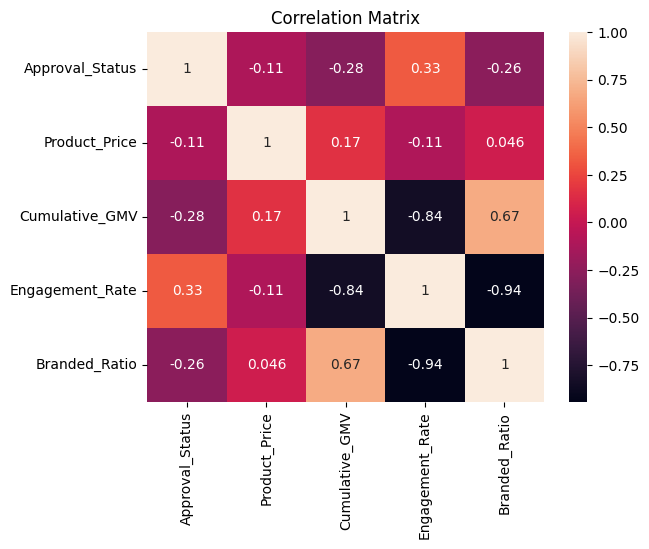

Correlation with Approval:
Approval_Status    1.000000
Engagement_Rate    0.327645
Product_Price     -0.110669
Branded_Ratio     -0.260693
Cumulative_GMV    -0.282785
Name: Approval_Status, dtype: float64


In [318]:
# CORRELATION MATRIX

import seaborn as sns

correlation_cols = ['Approval_Status', 'Product_Price', 'Cumulative_GMV',
                    'Engagement_Rate', 'Branded_Ratio']

corr = samples_with_engagement[correlation_cols].corr()

plt.figure()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

print("Correlation with Approval:")
print(corr['Approval_Status'].sort_values(ascending=False))